# Overview

What is the goal of this project?

To adapt machine learning and modeling techniques to predict an outcome using logistic regression.

What will the model predict?

The model will attempt to predict if a person will be readmitted within a certain period of time.

Data Source:
https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

# Environment Set up

In [1]:
#import libraries and logistic regression models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# Data Preparation (Wrangling and Cleaning)

In [2]:
#import dataset from source
df_raw = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')
df_raw

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
#show list of columns and their data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<AxesSubplot:>

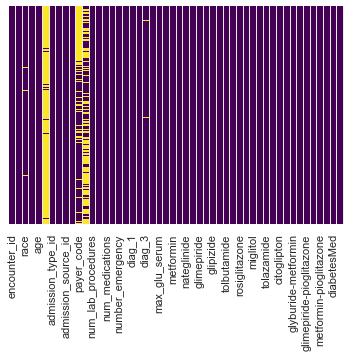

In [4]:
#display heatmap to visualize missing data
sns.heatmap(df_raw == '?',yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='age', ylabel='count'>

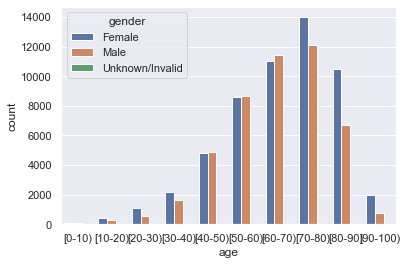

In [8]:
sns.countplot(x='age',hue = 'gender', data=df_raw)

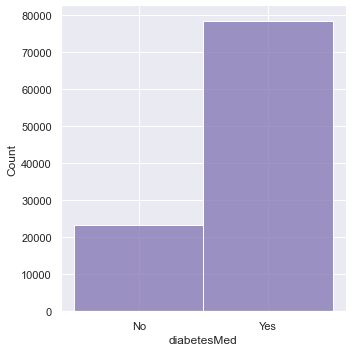

In [7]:
sns.displot(df_raw['diabetesMed'], kde=False, bins=30, color='m')

In [9]:
#group data to see how much data is missing
df_raw.groupby(['race'])['encounter_id'].count()

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: encounter_id, dtype: int64

In [10]:
df_raw.groupby(['gender'])['encounter_id'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [11]:
#make a new copy of the data set
hospital_ds = df_raw.copy()

#drop columns that will not be included in the model
#the following columns will be dropped because these columns are deemed irrelevant, missing large number of data, or meaning is simply unknown  
hospital_ds.drop(['patient_nbr','weight','admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty','num_lab_procedures','num_procedures','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change'],
                 axis=1, inplace= True)

#impute missing values in gender and race columns
#based on the groupby represented above, there are 3 unknown gender in the data set. Since more than half of the patients were female, more likely than not these 3 patients are also female.\
#similar to gender, the missing data for race is changed into "Caucasian" because they make up majority of the data set.
hospital_ds['gender'] = hospital_ds['gender'].replace(['Unknown/Invalid'],'Female')
hospital_ds['race'] = hospital_ds['race'].replace(['?'],'Caucasian')

#show new data set
hospital_ds    

,encounter_id,race,gender,age,time_in_hospital,num_medications,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),1,1,No,NO
1,149190,Caucasian,Female,[10-20),3,18,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),2,13,Yes,NO
3,500364,Caucasian,Male,[30-40),2,16,Yes,NO
4,16680,Caucasian,Male,[40-50),1,8,Yes,NO
...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),3,16,Yes,>30
101762,443847782,AfricanAmerican,Female,[80-90),5,18,Yes,NO
101763,443854148,Caucasian,Male,[70-80),1,9,Yes,NO
101764,443857166,Caucasian,Female,[80-90),10,21,Yes,NO


In [12]:
#changing non-numeric data into numeric data for the model

hospital_ds['race'] = hospital_ds['race'].replace(
    ['AfricanAmerican','Asian','Caucasian','Hispanic','Other'],
    [0,1,2,3,4])
hospital_ds['gender'] = hospital_ds['gender'].replace(['Female','Male'],[0,1])
hospital_ds['age'] = hospital_ds['age'].replace(
    ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],
    [0,1,2,3,4,5,6,7,8,9])
hospital_ds['diabetesMed'] = hospital_ds['diabetesMed'].replace(['No','Yes'],[0,1])
hospital_ds['readmitted'] = hospital_ds['readmitted'].replace(['<30','>30','NO'],[1,2,3])


hospital_ds.head()

,encounter_id,race,gender,age,time_in_hospital,num_medications,diabetesMed,readmitted
0,2278392,2,0,0,1,1,0,3
1,149190,2,0,1,3,18,1,2
2,64410,0,0,2,2,13,1,3
3,500364,2,1,3,2,16,1,3
4,16680,2,1,4,1,8,1,3


# Model Building, Predictions, and Evaluations

In [13]:
#assigning different variables for the model
y = hospital_ds['readmitted']
X = hospital_ds[['race', 'gender', 'age', 'time_in_hospital', 'num_medications','diabetesMed']]

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#create model
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

#run model
y_pred = logmodel.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2241
           2       1.00      0.00      0.00      7116
           3       0.54      1.00      0.70     10997

    accuracy                           0.54     20354
   macro avg       0.51      0.33      0.23     20354
weighted avg       0.64      0.54      0.38     20354



/Users/daviddunca/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


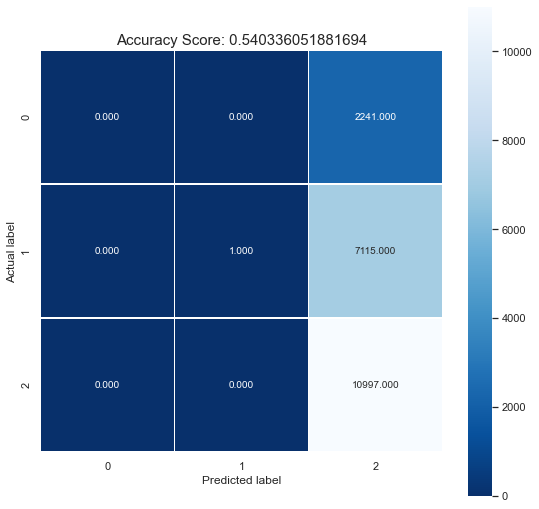

In [14]:
#confusion matrix visual to show accuracy score of model
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

# Conclusion

Some specific findings about this model:

The model has a 0.00 accuracy for predicting whether a patient will come back in less than 30 days.

The model has a 1.00 accuracy for prediciting whether a patient will come back in more than 30 days.

The model has a 0.54 accuracy for predicitng whether a paitient will not return at all.

The model did not perform with an expected accuracy. To improve this model, I would consider adding more features into the model. Only 6 out of the 49 possible features were used in this model.

Other ways of improving this model is by refining its ability to weigh certain features in making a predicition.

Overall, further exploratory data analysis is needed in order to identify additional features that can be added as a determinant for readmittance.